## The code examples for Graph Visualiser

In [1]:
import subprocess #https://pythonspot.com/python-subprocess/#:~:text=%20Python%20Subprocess%20%201%20Start%20a%20process,it%20in%20a%20string%20directly%20using...%20More%20
from collections import Counter
import networkx as nx #https://networkx.github.io/documentation/stable/tutorial.html
import matplotlib.pyplot as plt

In [2]:
def build_save_graph(a_dict, state_space, save_loc = 'TEMP.dot',  highest =1 , lowest = 0):
    fig, ax = plt.subplots(figsize=(10, 10))
    G=nx.MultiDiGraph()
    G.add_nodes_from(state_space)
    for k,v in a_dict.items():
        if v<= highest and v>= lowest:
            tmp_origin, tmp_destination = k[0], k[1]
            G.add_edge(tmp_origin, tmp_destination, weight =v, label=v)
    pos = nx.drawing.nx_pydot.graphviz_layout(G, prog ='dot')
    nx.draw_networkx(G,pos)
    edge_labels = {(n1,n2):d['label'] for n1,n2,d in G.edges(data=True)}
    nx.draw_networkx_edge_labels(G,pos, edge_labels = edge_labels)
    nx.drawing.nx_pydot.write_dot(G, save_loc)
    plt.show()

In [3]:
def make_png_from_bash_cmd(f_loc_dot, f_loc_png):
    bashCommand = 'dot'+ f_loc_dot + ' -Tpng -o '+f_loc_png
    process = subprocess.Popen(bashCommand.split(), stdout = subprocess.PIPE)
    output,error = process.communicate()

In [4]:
schedual = [['bed', 'breakfast','work', 'lunch','work', 'bar', 'dinner', 'home', 'bed'],
            ['bed', 'breakfast','work', 'lunch','work', 'bar', 'dinner', 'home', 'bed'],
            ['bed', 'work', 'lunch','work', 'bar', 'dinner', 'bar', 'home', 'bed'],
            ['bed', 'breakfast','work', 'lunch','work', 'home', 'tv', 'dinner',  'bed'],
            ['bed', 'work','work', 'home', 'dinner', 'bed'],
            ['bed', 'car','car', 'lunch','bar', 'dinner',  'bed'],
            ['bed', 'work', 'home', 'work', 'lunch','work',  'dinner', 'home', 'bed'],
            ['bed', 'breakfast','work', 'lunch','work', 'bar', 'dinner', 'home', 'bed']]

In [5]:
def construct_transition_dictionary(list_of_lists):
    all_transition_tuples = []
    for l in list_of_lists:
        for idx in range(len(l)-1):
            all_transition_tuples.append((l[idx], l[idx+1]))
    cnt = Counter(all_transition_tuples)
    ret = {}
    for k,v in cnt.items():
        total = sum([y for x,y in cnt.items() if x[0] == k[0]])
        ret[k] = round(v/float(total),3)
    return ret

In [6]:
sample_transition_dictionary = construct_transition_dictionary(schedual)
sample_transition_dictionary

{('bed', 'breakfast'): 0.5,
 ('breakfast', 'work'): 1.0,
 ('work', 'lunch'): 0.4,
 ('lunch', 'work'): 0.857,
 ('work', 'bar'): 0.267,
 ('bar', 'dinner'): 0.833,
 ('dinner', 'home'): 0.5,
 ('home', 'bed'): 0.625,
 ('bed', 'work'): 0.375,
 ('dinner', 'bar'): 0.125,
 ('bar', 'home'): 0.167,
 ('work', 'home'): 0.2,
 ('home', 'tv'): 0.125,
 ('tv', 'dinner'): 1.0,
 ('dinner', 'bed'): 0.375,
 ('work', 'work'): 0.067,
 ('home', 'dinner'): 0.125,
 ('bed', 'car'): 0.125,
 ('car', 'car'): 0.5,
 ('car', 'lunch'): 0.5,
 ('lunch', 'bar'): 0.143,
 ('home', 'work'): 0.125,
 ('work', 'dinner'): 0.067}

In [7]:
state_space = list(set([x for y in sample_transition_dictionary.keys() for x in y]))
state_space

['bed', 'car', 'dinner', 'tv', 'lunch', 'home', 'bar', 'breakfast', 'work']

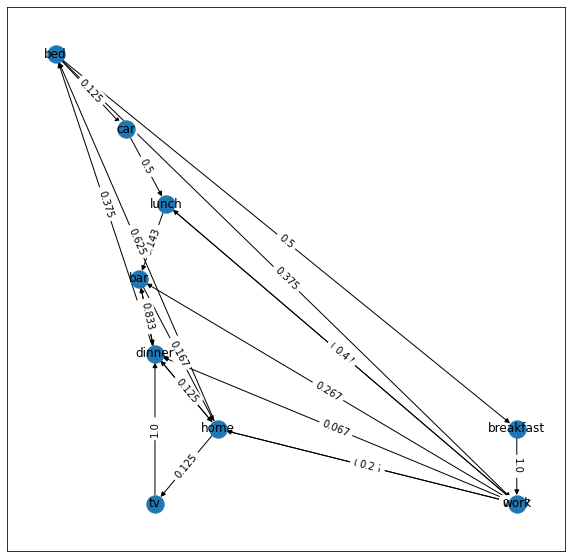

In [8]:
build_save_graph(sample_transition_dictionary, state_space, save_loc = 'TEMP.DOT')

In [9]:
sample_transition_dictionary.keys()

dict_keys([('bed', 'breakfast'), ('breakfast', 'work'), ('work', 'lunch'), ('lunch', 'work'), ('work', 'bar'), ('bar', 'dinner'), ('dinner', 'home'), ('home', 'bed'), ('bed', 'work'), ('dinner', 'bar'), ('bar', 'home'), ('work', 'home'), ('home', 'tv'), ('tv', 'dinner'), ('dinner', 'bed'), ('work', 'work'), ('home', 'dinner'), ('bed', 'car'), ('car', 'car'), ('car', 'lunch'), ('lunch', 'bar'), ('home', 'work'), ('work', 'dinner')])